## Connect Colab with Google drive and Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle/'

In [4]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('priyankraval/nurse-stress-prediction-wearable-sensors', unzip=True)

# Nurse Stress Prediction - Machine Learning Model

Dataset from Kaggle [Link](https://www.kaggle.com/datasets/priyankraval/nurse-stress-prediction-wearable-sensors)

### Dataset Nine Columns Description

#### X, Y, Z:
- ***Description***: Numerical values representing orientation data.
- ***Unique Entries***: Each column has 256 unique values.

#### EDA (Electrodermal Activity):
- ***Description***: Continuous numerical values measuring electrodermal activity.
- ***Unique Entries***: Contains 274,452 unique numerical values.

#### HR (Heart Rate):
- ***Description***: Continuous numerical values representing heart rate measurements.
- ***Unique Entries***: Comprises 6,268 distinct numerical values.

#### TEMP (Temperature):
- ***Description***: Continuous numerical values denoting temperature readings.
- ***Unique Entries***: Contains 599 unique numerical values.

#### id:
- ***Description***: Categorical data serving as identifiers for specific subjects or entities.
- ***Unique Entries***: Consists of 18 distinct categorical entries.

#### datetime:
- ***Description***: Object type encompassing a wide range of date and time entries.
- ***Unique Entries***: Holds approximately 10.6 million unique date and time values.

#### label:
- ***Description***: Categorical data representing different states or classes.
- ***Unique Entries***: Contains three unique categorical values.

---

Each column in this dataset offers distinct information. The orientation data (X, Y, Z) seemingly represents spatial or directional measurements. Electrodermal activity (EDA), heart rate (HR), and temperature (TEMP) columns provide continuous physiological measurements. The 'id' column serves as a categorical identifier, while 'datetime' indicates timestamps. Lastly, the 'label' column presents categorical classifications.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Reading dataset

In [6]:
data = pd.read_csv('/content/merged_data.csv')
print(data.shape)
data.head()


<ipython-input-6-b2294735682e>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/merged_data.csv')


(11509051, 9)


,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


## Performing EDA on the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usage: 790.3+ MB


In [ ]:
data.isnull().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

#### Converting the object variables into integer and datetime format

In [7]:
data.id.unique()

array([15, '15', '5C', '6B', '6D', '7A', '7E', '83', 83, '8B', '94', 94,
       'BG', 'CE', 'DF', 'E4', 'EG', 'F5'], dtype=object)

In [8]:
target_mapping = {15: 15,'15': 15,'5C': 53,'6B': 62,'6D': 64,'7A': 71,'7E': 75,'83': 83,83: 83,'8B': 82,'94': 94,94: 94,'BG': 27,'CE': 35,'DF': 46,'E4': 54,'EG': 57,'F5': 65}
data['id'] = data['id'].map(target_mapping)

data.head()


,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        int64  
 7   datetime  object 
 8   label     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 790.3+ MB


In [10]:
data.datetime.unique()

array(['2020-07-08 14:03:00.000000000', '2020-07-08 14:03:00.031249920',
       '2020-07-08 14:03:00.062500096', ...,
       '2020-07-23 17:28:59.937499904', '2020-07-23 17:28:59.968750080',
       '2020-07-23 17:29:00.000000000'], dtype=object)

In [11]:
data['datetime'] = pd.to_datetime(data['datetime'])


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype         
---  ------    -----         
 0   X         float64       
 1   Y         float64       
 2   Z         float64       
 3   EDA       float64       
 4   HR        float64       
 5   TEMP      float64       
 6   id        int64         
 7   datetime  datetime64[ns]
 8   label     float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 790.3 MB


In [13]:
data.describe()

,X,Y,Z,EDA,HR,TEMP,id,label
count,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07
mean,-2.823775e+01,-9.091032e-01,2.382449e+01,3.502127e+00,8.576090e+01,3.223435e+01,6.024097e+01,1.554202e+00
std,3.142310e+01,3.343382e+01,2.985317e+01,5.656541e+00,1.419642e+01,2.260516e+00,1.848968e+01,7.891827e-01
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00,5.100000e+01,2.409000e+01,1.500000e+01,0.000000e+00
25%,-5.200000e+01,-1.900000e+01,4.000000e+00,2.242060e-01,7.672000e+01,3.019000e+01,5.300000e+01,1.000000e+00
50%,-3.300000e+01,1.000000e+00,2.500000e+01,1.157407e+00,8.390000e+01,3.257000e+01,6.200000e+01,2.000000e+00
75%,-1.400000e+01,1.700000e+01,4.900000e+01,4.077436e+00,9.310000e+01,3.425000e+01,7.100000e+01,2.000000e+00
max,1.270000e+02,1.270000e+02,1.270000e+02,5.976071e+01,1.802300e+02,3.659000e+01,9.400000e+01,2.000000e+00


In [14]:
data.label.unique()

array([2., 0., 1.])

In [15]:
def skewKur(col):
  skewness = data[col].skew()
  kurtosis = data[col].kurt()
  return [skewness, kurtosis]


In [16]:
for col in data.columns:
  if col != 'datetime':
    res = skewKur(col)
    print(f'Skewness of {col} feature -> {res[0]}')
    print(f'Kurtosis of {col} feature -> {res[1]}\n')

Skewness of X feature -> 0.9662396920878424
Kurtosis of X feature -> 0.8489368705986484

Skewness of Y feature -> -0.20626391357535862
Kurtosis of Y feature -> -0.06743471926335465

Skewness of Z feature -> -0.3490533290581033
Kurtosis of Z feature -> 0.25403111851784255

Skewness of EDA feature -> 3.0261409778597668
Kurtosis of EDA feature -> 12.16955252489096

Skewness of HR feature -> 0.9278425500827757
Kurtosis of HR feature -> 2.3275633791378176

Skewness of TEMP feature -> -0.2828160906982833
Kurtosis of TEMP feature -> -1.0887129456181879

Skewness of id feature -> -0.2980288082621934
Kurtosis of id feature -> -0.2745117743700636

Skewness of label feature -> -1.3255098415728082
Kurtosis of label feature -> -0.08131856770271328



#### Let's first of all visualize the dataset distribution

In [ ]:
def plotGraph(col, bins=30, bandwidth=None):
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

  sns.histplot(col, bins=bins, kde=True, color='skyblue', alpha=0.7, ax=axes[0])
  axes[0].set_title(f'Distribution of {col.name}')
  axes[0].set_xlabel(f'{col.name} values')
  axes[0].set_ylabel('Count')

  sns.kdeplot(col, color='blue', fill=True, bw_adjust=bandwidth if bandwidth is not None else 1.0, ax=axes[1])
  axes[1].set_title(f'Kernel Density Estimate (KDE) plot of {col.name}')
  axes[1].set_xlabel(f'{col.name} values')
  axes[1].set_ylabel('Density')

  sns.boxplot(x=col, color='lightgray', width=0.3, linewidth=2, fliersize=5, ax=axes[2])
  axes[2].set_title(f'Box Plot of {col.name}')
  axes[2].set_xlabel(f'{col.name} values')
  axes[2].set_ylabel('Value')

  plt.savefig(f'{col.name}_plot.jpg', format='jpg')

  plt.tight_layout()
  plt.show()


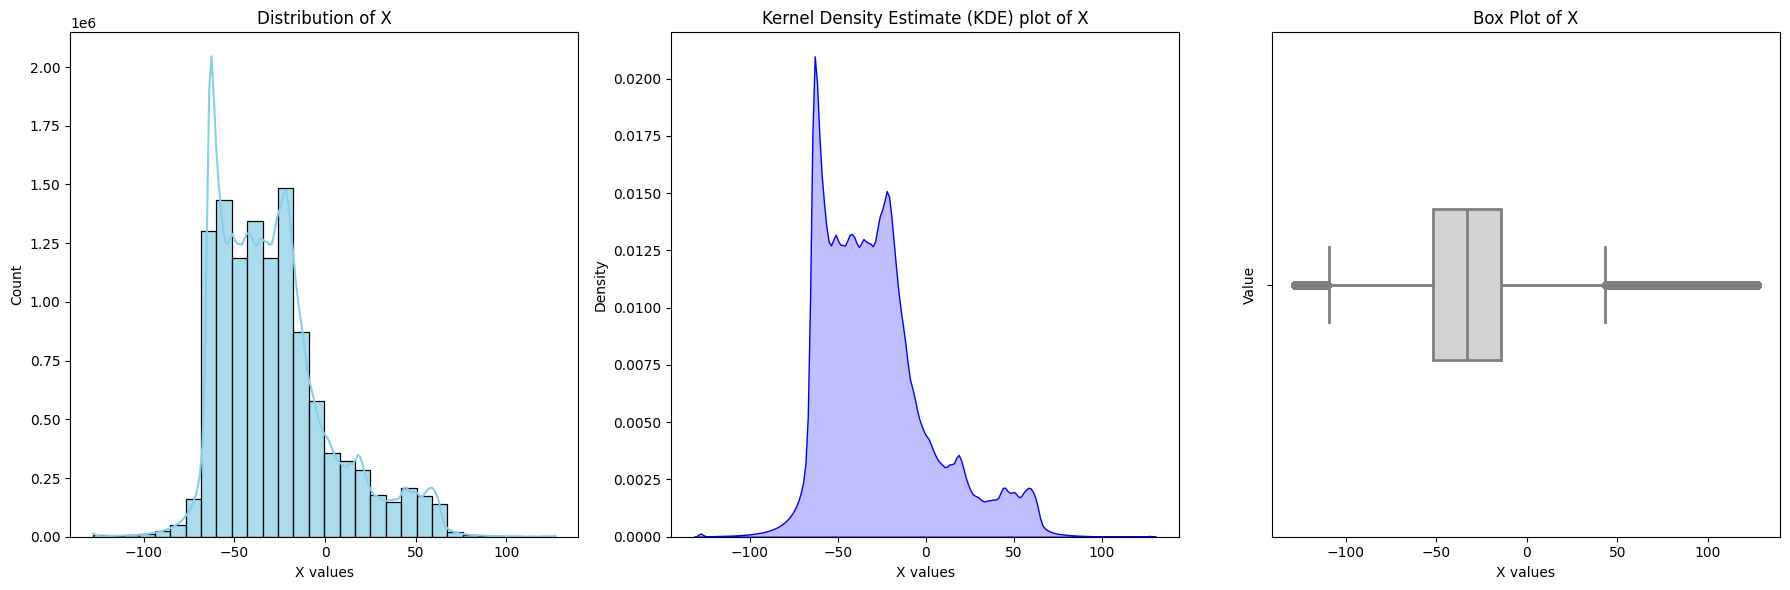

In [ ]:
plotGraph(data.X)


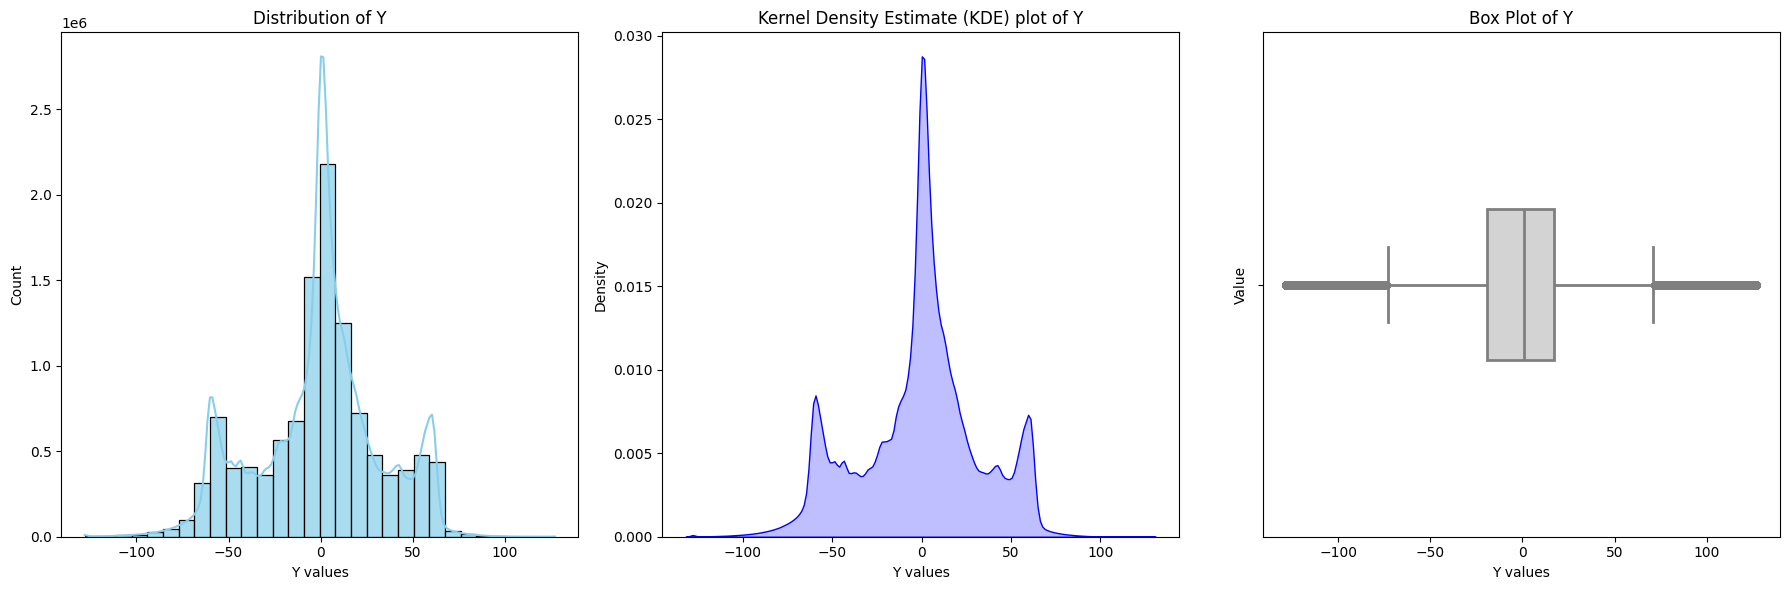

In [ ]:
plotGraph(data.Y)


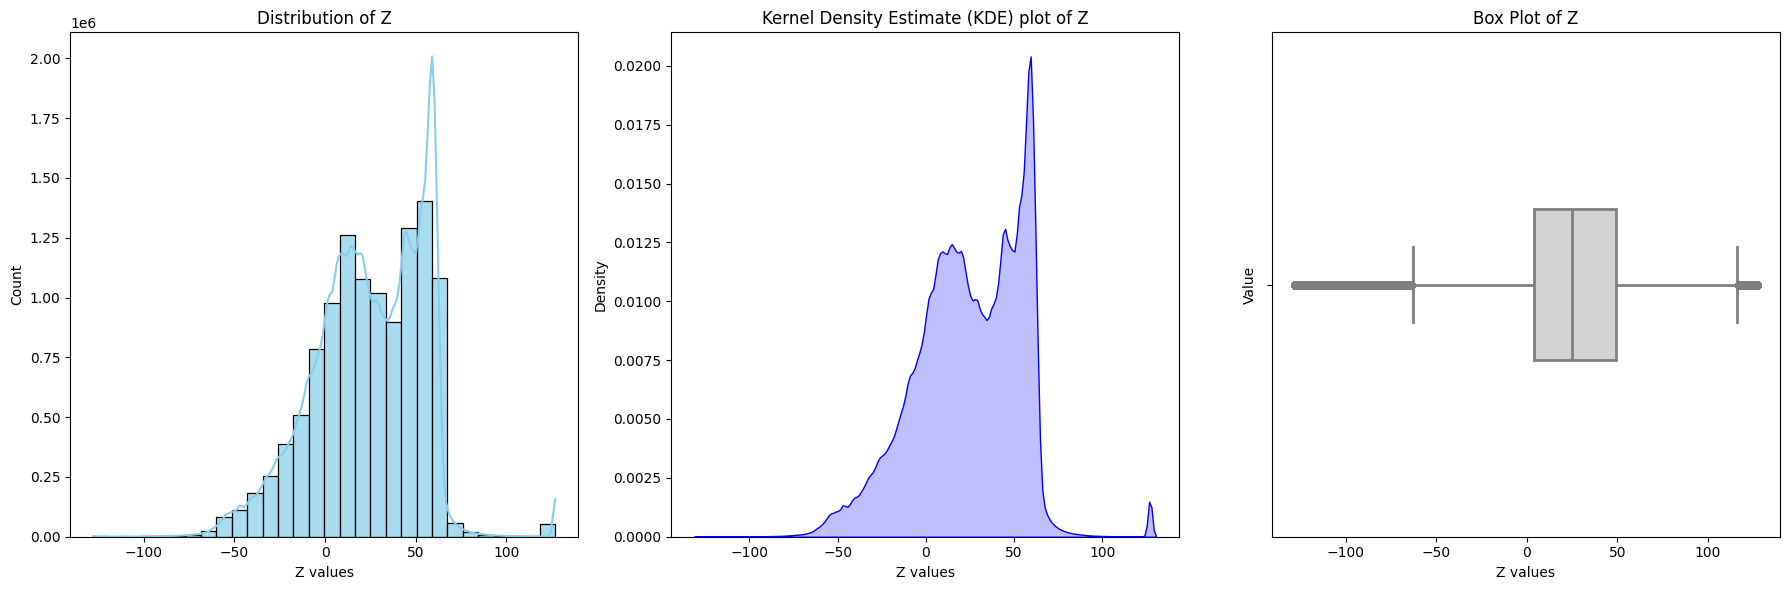

In [ ]:
plotGraph(data.Z)


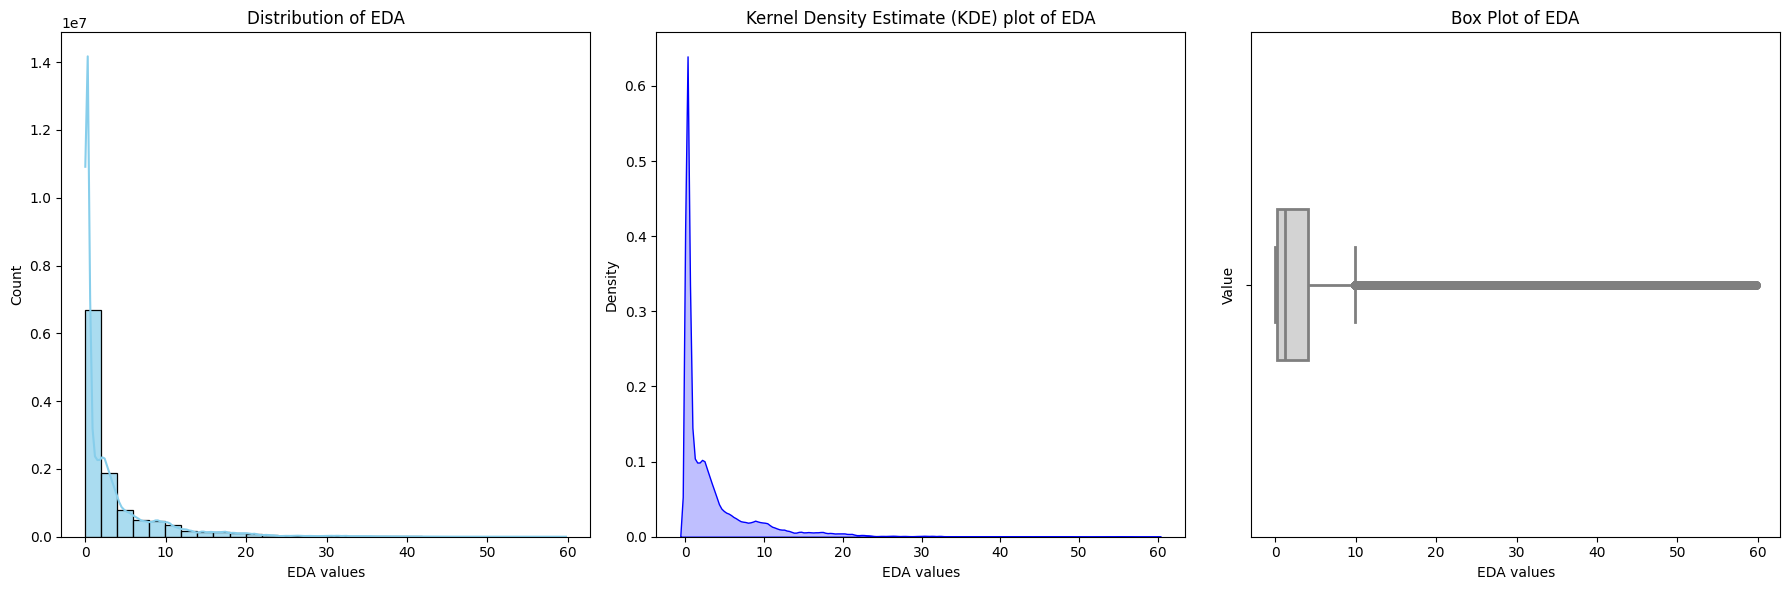

In [ ]:
# Electrodermal Activity
plotGraph(data.EDA)


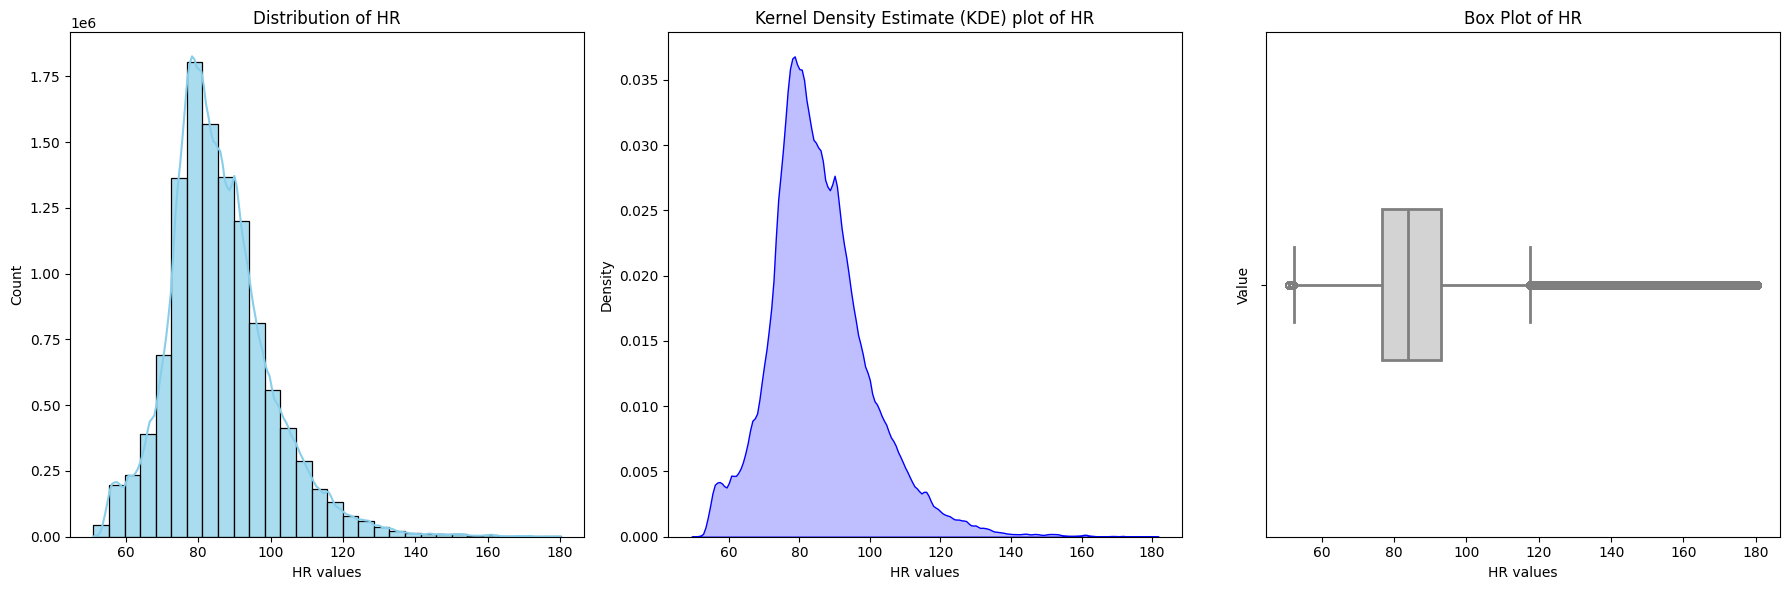

In [ ]:
# Heart Rate
plotGraph(data.HR)


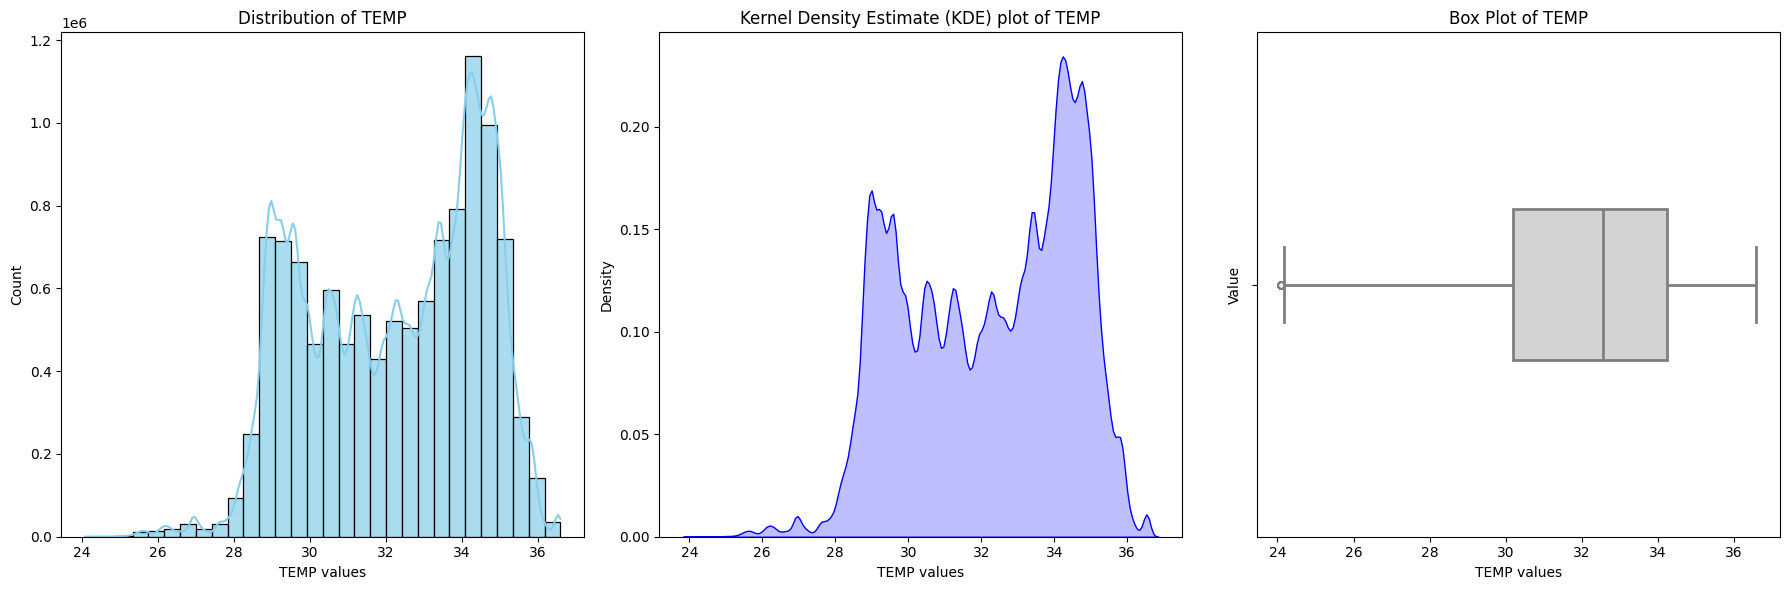

In [ ]:
# Temperature
plotGraph(data.TEMP)


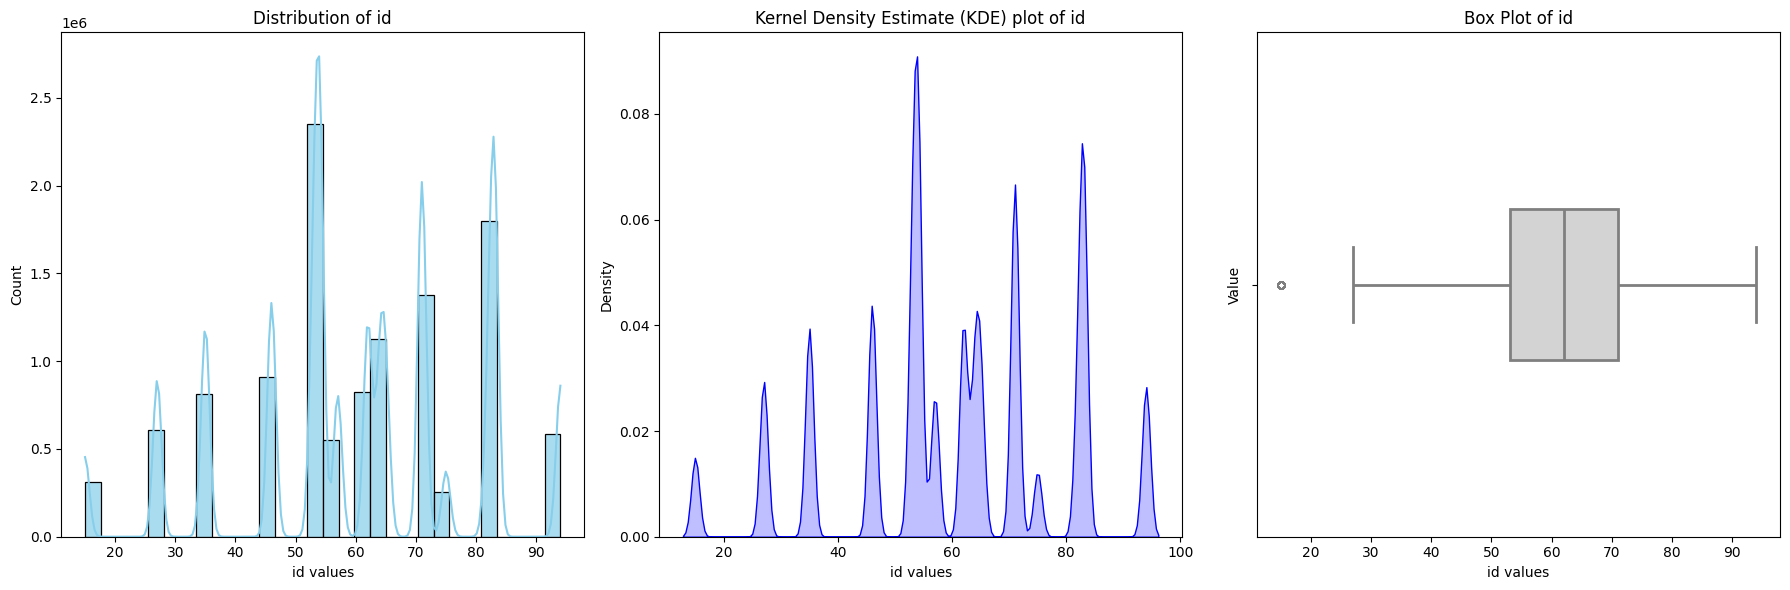

In [ ]:
plotGraph(data.id)


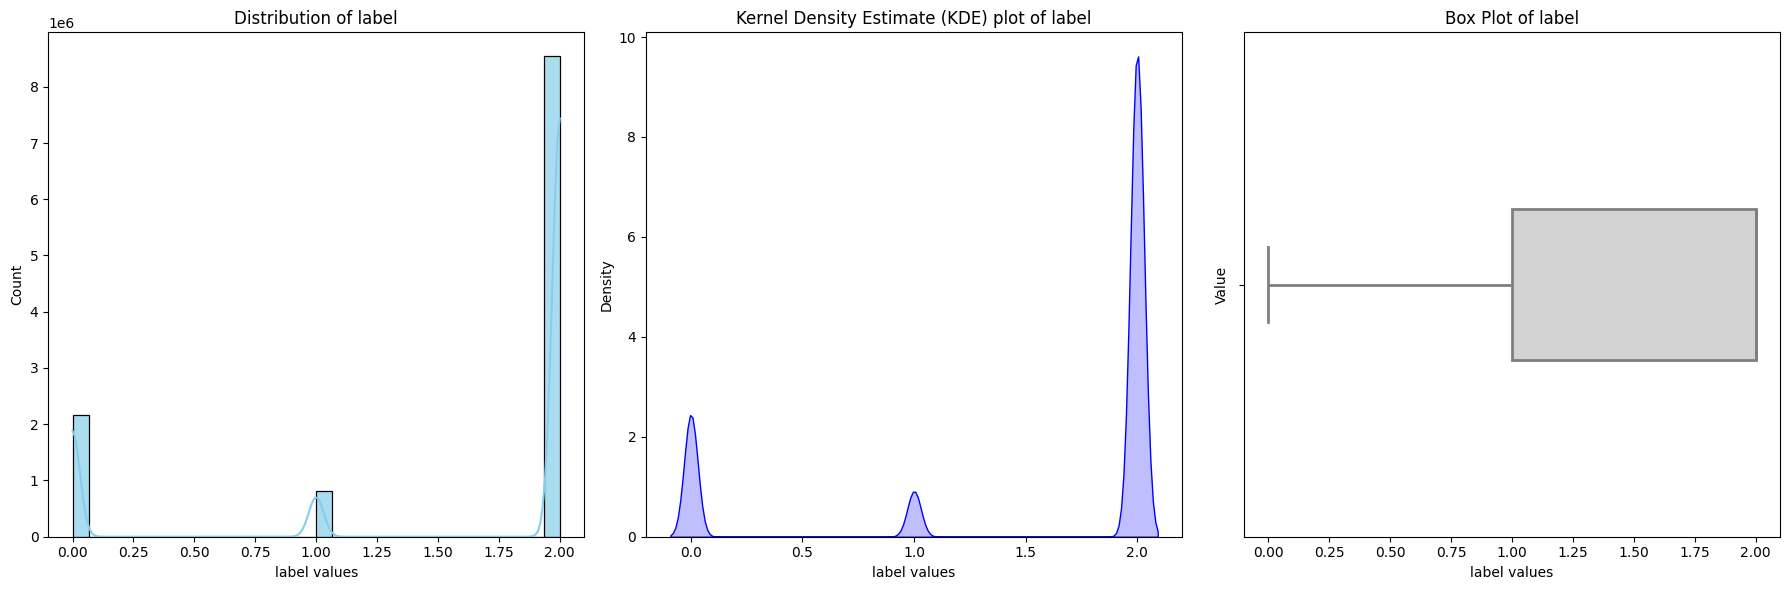

In [ ]:
# Different states or classes
plotGraph(data.label)


#### Let's see the relation between different variables

In [17]:
correlation = data.corr()
correlation


<ipython-input-17-521f87fcc686>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,X,Y,Z,EDA,HR,TEMP,id,label
X,1.000000,0.067204,0.197295,0.093888,0.126070,0.022847,-0.067898,-0.008351
Y,0.067204,1.000000,0.019084,-0.096138,-0.068020,-0.084576,-0.080448,-0.022143
Z,0.197295,0.019084,1.000000,0.005993,-0.104191,-0.029366,-0.142757,-0.058655
EDA,0.093888,-0.096138,0.005993,1.000000,0.142542,0.352888,0.116500,0.053214
HR,0.126070,-0.068020,-0.104191,0.142542,1.000000,0.158172,0.129800,-0.032983
TEMP,0.022847,-0.084576,-0.029366,0.352888,0.158172,1.000000,0.345134,0.135259
id,-0.067898,-0.080448,-0.142757,0.116500,0.129800,0.345134,1.000000,-0.232307
label,-0.008351,-0.022143,-0.058655,0.053214,-0.032983,0.135259,-0.232307,1.000000


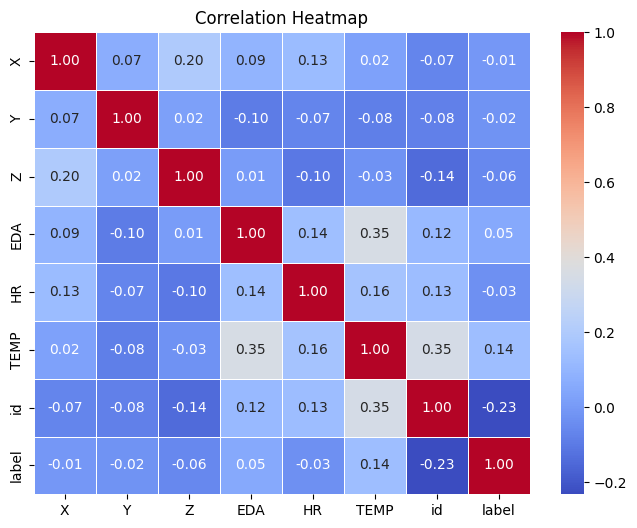

In [18]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")

plt.savefig('correlation_heatmap.jpg', format='jpg')
plt.show()


- EDA is related to TEMP by 0.35
- TEMP is related to label by 0.14
- Also, TEMP is related to id by 0.35

### Normalize the dataset using MinMaxScaler() to remove the effect of outliers

In [17]:
x = data.drop(columns=['label', 'datetime'], axis=1)
y = data[['label']]

print(x.shape)
print(y.shape)


(11509051, 7)
(11509051, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler = MinMaxScaler()
x = MinMaxScaler.fit_transform(x)
x = pd.DataFrame(x)
display(x)


,0,1,2,3,4,5,6
0,0.450980,0.262745,0.521569,0.113285,0.374758,0.5664,0.000000
1,0.423529,0.231373,0.490196,0.113285,0.374758,0.5664,0.000000
2,0.380392,0.196078,0.443137,0.113285,0.374758,0.5664,0.000000
3,0.317647,0.247059,0.352941,0.113285,0.374758,0.5664,0.000000
4,0.239216,0.278431,0.294118,0.113285,0.374758,0.5664,0.000000
...,...,...,...,...,...,...,...
11509046,0.439216,0.282353,0.596078,0.056660,0.289174,0.7744,0.632911
11509047,0.470588,0.305882,0.607843,0.056660,0.289174,0.7744,0.632911
11509048,0.392157,0.360784,0.611765,0.056660,0.289174,0.7744,0.632911
11509049,0.388235,0.388235,0.619608,0.056660,0.289174,0.7744,0.632911


## Model Building and Training starts

In [19]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=2024)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=2024)

print('Training set:', xtrain.shape, ytrain.shape)
print('Validation set:', xval.shape, yval.shape)
print('Testing set:', xtest.shape, ytest.shape)


Training set: (5524344, 7) (5524344, 1)
Validation set: (1381086, 7) (1381086, 1)
Testing set: (4603621, 7) (4603621, 1)


### Apply PCA to reduce the number of features

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7).fit(xtrain)
evr = pca.explained_variance_ratio_
display(evr)


array([0.41083897, 0.17528541, 0.11528192, 0.10439432, 0.08631051,
       0.06104842, 0.04684044])

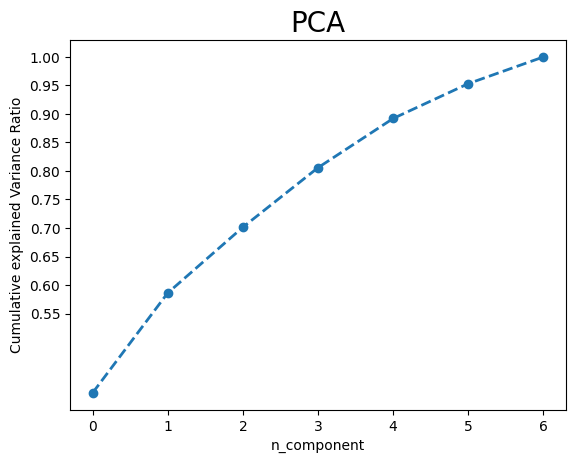

In [ ]:
plt.plot(np.cumsum(evr), linewidth=2, marker = 'o', linestyle = '--')
plt.title("PCA", fontsize=20)
plt.xlabel('n_component')
plt.ylabel('Cumulative explained Variance Ratio')
plt.yticks(np.arange(0.55, 1.05, 0.05))

plt.savefig('pca.jpg', format='jpg')
plt.show()


- 6 components provide approx. 100% of the result

In [20]:
from sklearn.decomposition import IncrementalPCA

xtrain_pca = IncrementalPCA(n_components=6).fit_transform(xtrain)
xtrain = xtrain_pca
xtrain


array([[ 0.20662357,  0.03957378,  0.26137022,  0.07777805, -0.00520136,
        -0.05038762],
       [-0.40256874, -0.04450596,  0.12335307,  0.04296442,  0.03014613,
         0.02444331],
       [ 0.35648076,  0.02927073, -0.05001771,  0.12468249,  0.03579944,
         0.1061942 ],
       ...,
       [ 0.27360019,  0.04442699, -0.15421041,  0.14739276,  0.01952663,
        -0.0626613 ],
       [ 0.02760466,  0.32687232,  0.18562174, -0.14322314, -0.0313888 ,
         0.23769624],
       [ 0.03982792,  0.25363381, -0.12803318, -0.15221655,  0.02079204,
        -0.10159769]])

In [21]:
xval_pca = IncrementalPCA(n_components=6).fit_transform(xval)
xval = xval_pca
display(xval)


array([[ 0.03725995,  0.24557733, -0.14486128, -0.17996846,  0.01765415,
        -0.04736283],
       [-0.02640327, -0.06815174,  0.09587904,  0.04034339, -0.10154376,
         0.04106192],
       [-0.23251374, -0.22836852, -0.08610155, -0.11387205, -0.13794161,
        -0.0556697 ],
       ...,
       [-0.41486531,  0.37609157, -0.2076805 ,  0.21036329, -0.09154764,
        -0.06552583],
       [ 0.3393325 , -0.00791066, -0.06423961,  0.10792587, -0.0600478 ,
         0.0118944 ],
       [-0.41494762, -0.06012658,  0.03333663, -0.07749771, -0.09404067,
         0.01479668]])

In [22]:
xtest_pca = IncrementalPCA(n_components=6).fit_transform(xtest)
xtest = xtest_pca
display(xtest)


array([[-0.37875988,  0.13512781, -0.21579015, -0.07995875,  0.09648242,
        -0.04425769],
       [ 0.33435288,  0.00961626, -0.13953026, -0.14572376, -0.07327946,
        -0.09535383],
       [ 0.21589593,  0.10191504, -0.09348247,  0.00344624, -0.09840958,
        -0.09152121],
       ...,
       [ 0.02257991,  0.16646184, -0.1033964 ,  0.20250725, -0.1211586 ,
        -0.07835133],
       [-0.43396603, -0.09555399,  0.02051489, -0.0459391 , -0.15970835,
        -0.04526824],
       [ 0.1933503 ,  0.12258457,  0.23505327,  0.05560513,  0.02809148,
        -0.05503015]])

In [ ]:
print(xtrain.shape)
print(xval.shape)
print(xtest.shape)


(5524344, 6)
(1381086, 6)
(4603621, 6)


In [60]:
ytrain = ytrain.values.reshape(-1)
yval = yval.values.reshape(-1)
ytest = ytest.values.reshape(-1)

print(ytrain.shape)
print(yval.shape)
print(ytest.shape)


(5524344,)
(1381086,)
(4603621,)


### Start building the models

In [23]:
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#### Create a DataFrame to store the accuracies of the different models

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score

results = pd.DataFrame(columns=['Model', 'MSE_train', 'R2_train', 'MSE_val', 'R2_val', 'MSE_test', 'R2_test'])


#### Regressor Models

##### Linear Regression Model

In [25]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)


LinearRegression()

In [26]:
ypred_train = lr.predict(xtrain)
ypred_val = lr.predict(xval)
ypred_test = lr.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_val = mean_squared_error(yval, ypred_val)
r2_val = r2_score(yval, ypred_val)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Linear Regression', mse_train, r2_train, mse_val, r2_val, mse_test, r2_test]


##### Elastic Net Regressor Model

In [27]:
elastic = ElasticNet()
elastic.fit(xtrain, ytrain)


ElasticNet()

In [28]:
ypred_train = elastic.predict(xtrain)
ypred_val = elastic.predict(xval)
ypred_test = elastic.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_val = mean_squared_error(yval, ypred_val)
r2_val = r2_score(yval, ypred_val)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Elastic Net Regression', mse_train, r2_train, mse_val, r2_val, mse_test, r2_test]


##### SGD Regressor Model

In [61]:
sgd = SGDRegressor()
sgd.fit(xtrain, ytrain)


SGDRegressor()

In [30]:
ypred_train = sgd.predict(xtrain)
ypred_val = sgd.predict(xval)
ypred_test = sgd.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_val = mean_squared_error(yval, ypred_val)
r2_val = r2_score(yval, ypred_val)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['SGD Regression', mse_train, r2_train, mse_val, r2_val, mse_test, r2_test]


##### Decision Tree Regression Model

In [31]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)


DecisionTreeRegressor()

In [32]:
ypred_train = dtr.predict(xtrain)
ypred_val = dtr.predict(xval)
ypred_test = dtr.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_val = mean_squared_error(yval, ypred_val)
r2_val = r2_score(yval, ypred_val)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Decision Tree Regression', mse_train, r2_train, mse_val, r2_val, mse_test, r2_test]


##### XG Boost Regression Model

In [62]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
ypred_train = xgb.predict(xtrain)
ypred_val = xgb.predict(xval)
ypred_test = xgb.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_val = mean_squared_error(yval, ypred_val)
r2_val = r2_score(yval, ypred_val)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['XG Boost Regression', mse_train, r2_train, mse_val, r2_val, mse_test, r2_test]


#### Classifier Models

##### LGBM Multi Class Classifier Model

In [63]:
LGBM = LGBMClassifier(objective='multiclass')
LGBM.fit(xtrain, ytrain)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.400556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 5524344, number of used features: 6
[LightGBM] [Info] Start training from score -1.671585
[LightGBM] [Info] Start training from score -2.660909
[LightGBM] [Info] Start training from score -0.298182


LGBMClassifier(objective='multiclass')

In [36]:
ypred_train = LGBM.predict(xtrain)
ypred_val = LGBM.predict(xval)
ypred_test = LGBM.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_val = mean_squared_error(yval, ypred_val)
r2_val = r2_score(yval, ypred_val)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

accuracy = accuracy_score(ytest, ypred_test)

results.loc[len(results)] = ['LGBM Classifier', mse_train, r2_train, mse_val, r2_val, mse_test, r2_test]


Accuracy is: 83.073%


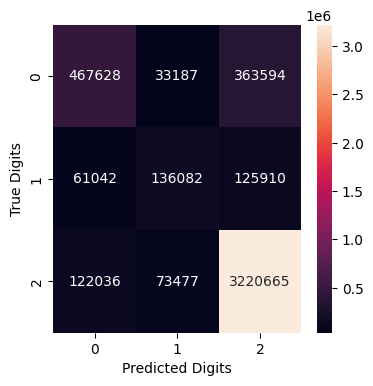

In [37]:
print("Accuracy is: {0:.3f}%".format(accuracy * 100))
cm = confusion_matrix(ytest, ypred_test)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


##### XGB Multi boosting Classifier Model

In [38]:
XGB = XGBClassifier(objective='multi:softmax')
XGB.fit(xtrain, ytrain)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [39]:
ypred_train = XGB.predict(xtrain)
ypred_val = XGB.predict(xval)
ypred_test = XGB.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_val = mean_squared_error(yval, ypred_val)
r2_val = r2_score(yval, ypred_val)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

accuracy = accuracy_score(ytest, ypred_test)

results.loc[len(results)] = ['XG Boost Classifier', mse_train, r2_train, mse_val, r2_val, mse_test, r2_test]


Accuracy is: 83.135%


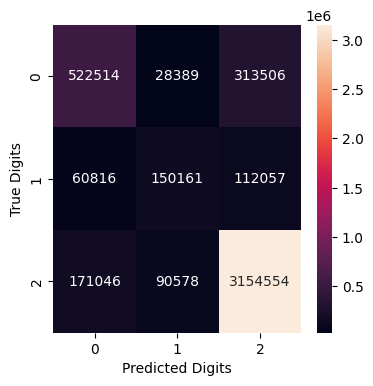

In [40]:
print("Accuracy is: {0:.3f}%".format(accuracy * 100))
cm = confusion_matrix(ytest, ypred_test)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


#### Deep Neural Network Model

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=xtrain.shape[1],))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer="adam", loss='mean_squared_error', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                        

In [42]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.fit(xtrain, ytrain, epochs=20, batch_size=64, validation_data=(xval, yval), callbacks=[early_stopping])


Epoch 1/20
86318/86318 [==============================] - 303s 3ms/step - loss: 0.3986 - accuracy: 0.1302 - val_loss: 1.7611 - val_accuracy: 0.1604
Epoch 2/20
86318/86318 [==============================] - 290s 3ms/step - loss: 0.3626 - accuracy: 0.1451 - val_loss: 0.4622 - val_accuracy: 0.1152
Epoch 3/20
86318/86318 [==============================] - 289s 3ms/step - loss: 0.3641 - accuracy: 0.1433 - val_loss: 0.5594 - val_accuracy: 0.0953
Epoch 4/20
86318/86318 [==============================] - 295s 3ms/step - loss: 0.3629 - accuracy: 0.1431 - val_loss: 0.5083 - val_accuracy: 0.1145


##### Evaluate the accuracy of the DNN model

In [43]:
eval = model.evaluate(xtest, ytest)

print(f"Test Loss: {eval[0]}")
print(f"Test Accuracy: {eval[1]}")


143864/143864 [==============================] - 266s 2ms/step - loss: 0.4584 - accuracy: 0.1150
Test Loss: 0.4583929777145386
Test Accuracy: 0.11496037244796753


In [44]:
ypred_train = model.predict(xtrain)
ypred_val = model.predict(xval)
ypred_test = model.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_val = mean_squared_error(yval, ypred_val)
r2_val = r2_score(yval, ypred_val)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Deep NN', mse_train, r2_train, mse_val, r2_val, mse_test, r2_test]


143864/143864 [==============================] - 240s 2ms/step


## Now, Let's watch accuracies of all the models in the increasing order of testing MSE

In [46]:
results = results.sort_values(by='MSE_test', ascending=True)
results


,Model,MSE_train,R2_train,MSE_val,R2_val,MSE_test,R2_test
4,XG Boost Regression,0.204959,0.670992,0.359257,4.233017e-01,0.355257,4.293855e-01
7,Deep NN,0.305992,0.508809,0.438734,2.957209e-01,0.434882,3.014910e-01
6,XG Boost Classifier,0.244597,0.607362,0.491024,2.117828e-01,0.484412,2.219365e-01
5,LGBM Classifier,0.323493,0.480715,0.490993,2.118316e-01,0.485734,2.198123e-01
0,Linear Regression,0.549359,0.118145,0.551217,1.151569e-01,0.550664,1.155217e-01
2,SGD Regression,0.549366,0.118134,0.551315,1.150005e-01,0.550770,1.153516e-01
1,Elastic Net Regression,0.622959,0.000000,0.622955,-2.460906e-07,0.622586,-9.965216e-09
3,Decision Tree Regression,0.000000,1.000000,0.747171,-1.993990e-01,0.741888,-1.916233e-01


- Here we can see that R2 Score and Mean Absolute Error is best for XG Boost Regression Model.
- But DNN is also best fit to this model, due to lack to resources full epochs are not played and applying early stopping.

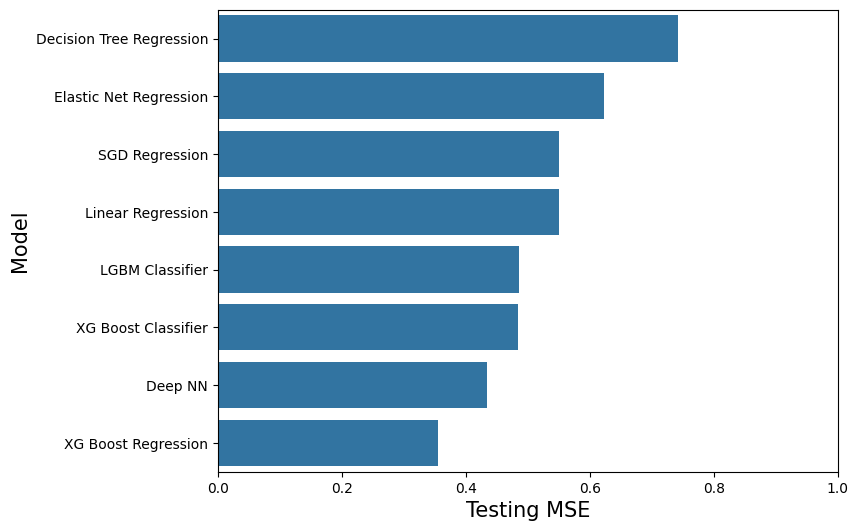

In [54]:
f, axe = plt.subplots(1,1, figsize=(8,6))

results.sort_values(by=['MSE_test'], ascending=False, inplace=True)

sns.barplot(x='MSE_test', y='Model',  data = results, ax = axe)
axe.set_xlabel('Testing MSE', size=15)
axe.set_ylabel('Model', size=15)
axe.set_xlim(0,1)

plt.savefig('MSE_plot.png', bbox_inches='tight')
plt.show()


# XG Boost Regression is best fit for `Nurse Stress Prediction` dataset, let's visualize its results.

In [64]:
ypred = xgb.predict(xtest)

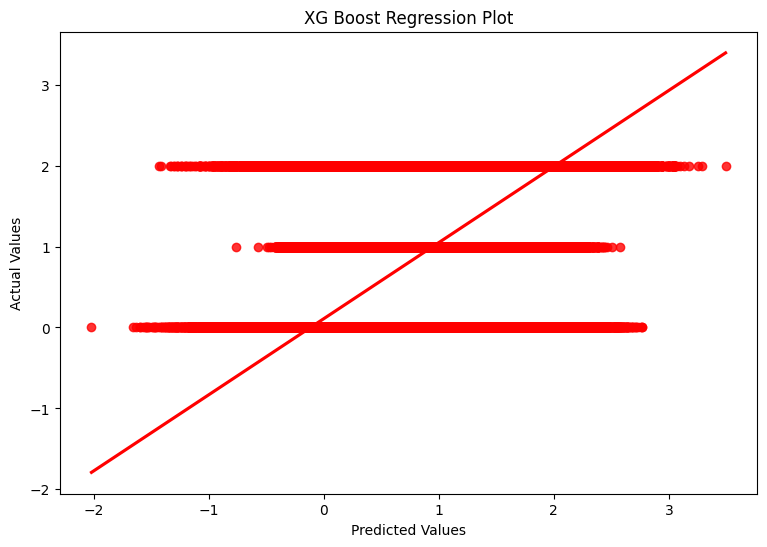

In [55]:
# Creating regression plot to visualize the model performance
plt.figure(figsize=(9,6))

sns.regplot(x=ypred, y=ytest, color='red')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('XG Boost Regression Plot')

plt.savefig('prediction_plot.png', bbox_inches='tight')
plt.show()


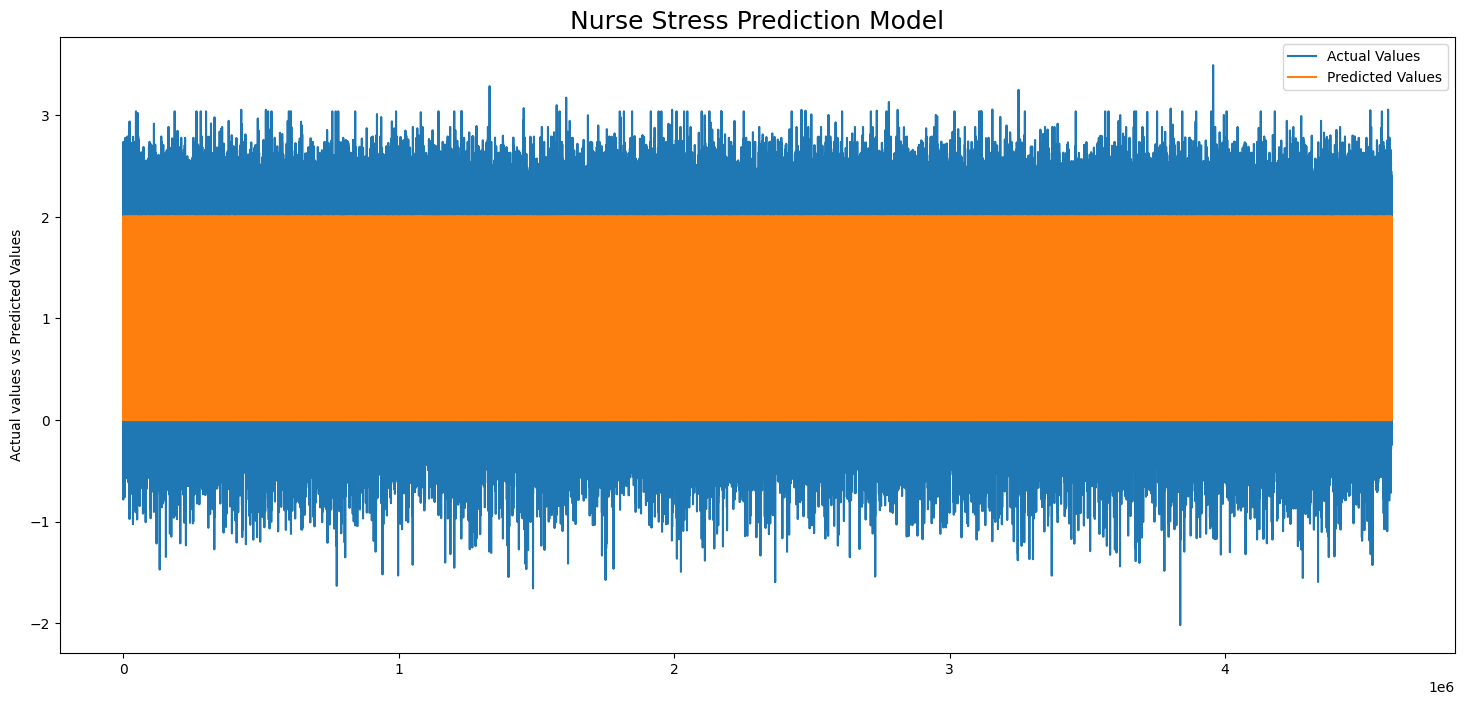

In [65]:
plot_df = pd.DataFrame({'pred':ypred.flatten(), 'actual':ytest})

# Creating plot for actual vs Predicted values
plt.figure(figsize=(18,8))

plt.plot(plot_df['pred'].tolist(), label='Actual Values')
plt.plot(plot_df['actual'].tolist(), label='Predicted Values')

plt.ylabel('Actual values vs Predicted Values')
plt.title('Nurse Stress Prediction Model', fontsize=18)

plt.legend()
plt.savefig('actual_vs_prediction.png', bbox_inches='tight')
plt.show()


## Nurse Stress Prediction Model Completed with best fits for XG Boost and DNN Model.